<a href="https://colab.research.google.com/github/Navras19/Data_Analysis_Project_Electric_Cars-/blob/main/Data_Analysis_Project_Electric_Cars_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Greenwish Ltd needs a new fleet of sales rep cars for the UK. Employees, shareholders, clients and customers all want electric vehicles considering the large millage done by reps every year. Greenwish Ltd board needs to make a decision, but it must be based on data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 

In [ ]:
!pip install pyodbc
import pyodbc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 333 kB 8.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
# df is dataframe .Asking Pandas to read file 

df = pd.read_csv("/content/drive/MyDrive/evdataset.csv")

df

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [ ]:
# Pulling the first 10 rows of data 

df.head(10) # first 10 rows

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5
5,1178,CUPRA,https://ev-database.org/car/1178/CUPRA-Born-11...,270,195,230,415,255,320,8.9,...,38,410,4322,1809,1540,2766,2240,607,385,5
6,1279,Skoda,https://ev-database.org/car/1279/Skoda-Enyaq-i...,320,235,275,480,300,375,8.7,...,53,440,4649,1879,1616,2764,2509,619,585,5
7,1438,Porsche,https://ev-database.org/car/1438/Porsche-Tayca...,395,290,340,565,370,455,3.3,...,45,980,4974,1967,1412,2904,2880,635,405,4
8,1281,Skoda,https://ev-database.org/car/1281/Skoda-Enyaq-i...,395,290,340,580,370,460,6.9,...,49,500,4653,1879,1604,2768,2750,630,585,5
9,1625,Porsche,https://ev-database.org/car/1625/Porsche-Tayca...,395,295,345,565,375,460,3.2,...,45,1000,4963,1966,1391,2900,2880,550,405,4


In [ ]:
# Pulling last 10 rows of data to get better idea of data 

df.tail(10) # last 10 rows 

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
184,1567,Subaru,https://ev-database.org/car/1567/Subaru-Solter...,360,255,300,520,320,405,6.9,...,28,460,4690,1860,1650,2850,2550,515,441,5
185,1755,Ford,https://ev-database.org/car/1755/Ford-Mustang-...,350,250,295,505,315,395,6.3,...,46,360,4713,1881,1624,2984,2640,577,322,5
186,1171,Honda,https://ev-database.org/car/1171/Honda-e,165,120,140,255,155,195,9.0,...,33,180,3894,1752,1512,2538,1855,342,171,4
187,1394,Porsche,https://ev-database.org/car/1394/Porsche-Tayca...,450,345,400,670,450,545,5.4,...,53,1170,4963,1966,1394,2900,2795,665,407,4
188,1557,Volkswagen,https://ev-database.org/car/1557/Volkswagen-ID...,420,305,360,620,395,490,8.4,...,52,540,4599,1852,1615,2771,2540,495,549,5
189,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,49,500,4588,1865,1614,2764,2715,575,535,5
193,1353,Peugeot,https://ev-database.org/car/1353/Peugeot-e-Tra...,285,185,230,395,230,295,14.3,...,25,290,4956,1920,1890,3275,3100,1044,603,9


In [ ]:
# Dimensionality of the DataFrame
# Number of rows and columns

df.shape


(194, 27)

In [ ]:
# Another way of getting dimensionality of DataFrame 

print('Number of Rows: ',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows:  194
Number of Columns: 27


In [ ]:
# Brief summary of info

df.info()

# As we can see at this point we dont have any null values which should be removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [ ]:
# Also returns count of any null values

df.isnull().sum()

id                             0
Make                           0
link                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

In [ ]:
# Returns values of duplicated data,

df.duplicated().sum()

# as we can see the output is zero

0

In [ ]:
# statistical overview of data 

df.describe()

,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1526.257732,343.247423,247.500000,293.144330,502.706186,315.721649,393.608247,7.870619,177.015464,345.592784,...,44.396907,528.711340,4702.087629,1880.061856,1620.706186,2899.829897,2633.139175,619.257732,507.190722,5.536082
std,154.958947,92.173078,75.553656,84.558652,138.297461,98.967440,117.054175,3.168385,38.110213,101.384377,...,15.617918,256.219808,378.219208,68.719346,152.249425,238.567154,415.592250,199.938995,192.411664,1.530768
min,1116.000000,135.000000,95.000000,115.000000,210.000000,125.000000,160.000000,2.800000,125.000000,135.000000,...,24.000000,150.000000,3631.000000,1622.000000,1378.000000,2322.000000,1300.000000,245.000000,171.000000,4.000000
25%,1437.250000,280.000000,185.000000,230.000000,395.000000,230.000000,295.000000,5.400000,150.000000,265.000000,...,34.000000,312.500000,4469.750000,1837.000000,1519.750000,2764.000000,2310.000000,497.000000,405.000000,5.000000
50%,1557.500000,350.000000,250.000000,300.000000,515.000000,320.000000,400.000000,7.400000,160.000000,352.500000,...,46.000000,470.000000,4694.000000,1887.000000,1614.000000,2900.000000,2660.000000,572.500000,472.500000,5.000000
75%,1648.750000,403.750000,295.000000,345.000000,595.000000,375.000000,470.000000,9.650000,200.000000,410.000000,...,51.750000,650.000000,4959.000000,1920.750000,1652.000000,3082.500000,2968.750000,645.000000,558.250000,5.000000
max,1757.000000,595.000000,470.000000,535.000000,895.000000,615.000000,740.000000,19.100000,261.000000,640.000000,...,110.000000,1170.000000,5391.000000,2011.000000,1927.000000,3430.000000,3500.000000,1121.000000,1410.000000,9.000000


In [ ]:
# searching for covariance between columns

df.cov()



,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
id,24012.275199,2123.070616,1471.398964,1755.247583,2843.107206,1803.206827,2220.490091,-8.169072,9.721382,2015.468191,...,-169.227178,-259.148016,8486.428075,981.828535,3116.112387,7674.406762,8186.057208,-214.429464,295.997222,25.285989
City - Cold Weather,2123.070616,8495.876289,6921.373057,7775.876022,12688.705197,9027.307569,10710.501576,-200.733107,2424.457294,9303.894023,...,546.916831,16095.657283,9006.605149,1997.362855,-6772.046098,2344.208109,12133.509428,-6149.986379,-1856.011164,-64.418300
Highway - Cold Weather,1471.398964,6921.373057,5708.354922,6380.699482,10406.541451,7468.782383,8832.383420,-170.884715,2066.489637,7653.950777,...,484.028497,13735.621762,6691.126943,1511.217617,-6270.349741,1279.183938,8854.339378,-5514.274611,-2015.945596,-57.953368
Combined - Cold Weather,1755.247583,7775.876022,6380.699482,7150.165589,11663.726564,8340.465253,9877.067197,-189.166204,2283.008119,8566.908819,...,528.305112,15193.710272,7711.355163,1742.446985,-6729.770846,1658.672347,10334.249239,-5991.747236,-2088.012125,-62.860157
City - Mild Weather,2843.107206,12688.705197,10406.541451,11663.726564,19126.187837,13625.109503,16158.578602,-304.502978,3603.818039,13996.833102,...,921.485097,24173.453608,10059.398937,2357.759201,-11245.237033,1367.716602,13835.191363,-10714.690722,-4061.140564,-106.147375
Highway - Mild Weather,1803.206827,9027.307569,7468.782383,8340.465253,13625.109503,9794.554244,11575.361893,-224.711848,2699.703809,10017.704717,...,659.841622,18068.810427,7818.667005,1798.504353,-8552.222104,1092.869505,10336.349821,-7618.736179,-3035.164254,-78.549490
Combined - Mild Weather,2220.490091,10710.501576,8832.383420,9877.067197,16158.578602,11575.361893,13701.679932,-262.940067,3136.472411,11859.637573,...,782.550077,21040.943326,8930.614818,2070.112441,-9890.048341,1199.969286,12010.920090,-9058.136852,-3514.914534,-91.814807
Acceleration 0 - 100 km/h,-8.169072,-200.733107,-170.884715,-189.166204,-304.502978,-224.711848,-262.940067,10.038666,-105.351875,-227.482493,...,-20.048900,-577.846349,11.399997,-48.069676,356.311012,180.853007,-71.458066,353.401912,248.226358,3.525677
Top Speed,9.721382,2424.457294,2066.489637,2283.008119,3603.818039,2699.703809,3136.472411,-105.351875,1452.388361,2730.560734,...,169.335799,8060.227285,3525.397602,1153.962769,-3922.751910,-58.100983,3976.754313,-2500.667219,-1582.878612,-34.842530
Electric Range,2015.468191,9303.894023,7653.950777,8566.908819,13996.833102,10017.704717,11859.637573,-227.482493,2730.560734,10278.791865,...,657.146921,18225.120186,8429.326024,1936.672988,-8336.923375,1480.904466,11345.072512,-7573.650980,-2832.885663,-77.728754


In [ ]:
# returns any correlations in the dataframe
df.corr()

,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
id,1.000000,0.148643,0.125678,0.133956,0.132667,0.117581,0.122418,-0.016639,0.001646,0.128289,...,-0.069925,-0.006527,0.144799,0.092202,0.132081,0.207595,0.127113,-0.006921,0.009927,0.106599
City - Cold Weather,0.148643,1.000000,0.993877,0.997671,0.995403,0.989605,0.992702,-0.687348,0.690191,0.995611,...,0.379922,0.681541,0.258353,0.315336,-0.482570,0.106606,0.316749,-0.333713,-0.104651,-0.456558
Highway - Cold Weather,0.125678,0.993877,1.000000,0.998745,0.995948,0.998854,0.998701,-0.713855,0.717689,0.999215,...,0.410197,0.709545,0.234153,0.291067,-0.545106,0.070969,0.281990,-0.365036,-0.138673,-0.501088
Combined - Cold Weather,0.133956,0.997671,0.998745,1.000000,0.997390,0.996644,0.997891,-0.706070,0.708448,0.999298,...,0.400040,0.701283,0.241118,0.299863,-0.522741,0.082223,0.294072,-0.354403,-0.128335,-0.485633
City - Mild Weather,0.132667,0.995403,0.995948,0.997390,1.000000,0.995482,0.998164,-0.694927,0.683766,0.998262,...,0.426630,0.682200,0.192315,0.248088,-0.534071,0.041454,0.240715,-0.387497,-0.152617,-0.501402
Highway - Mild Weather,0.117581,0.989605,0.998854,0.996644,0.995482,1.000000,0.999207,-0.716631,0.715785,0.998401,...,0.426898,0.712565,0.208880,0.264448,-0.567585,0.046288,0.251309,-0.385029,-0.159389,-0.518491
Combined - Mild Weather,0.122418,0.992702,0.998701,0.997891,0.998164,0.999207,1.000000,-0.708977,0.703094,0.999340,...,0.428057,0.701561,0.201721,0.257352,-0.554953,0.042971,0.246900,-0.387039,-0.156062,-0.512409
Acceleration 0 - 100 km/h,-0.016639,-0.687348,-0.713855,-0.706070,-0.694927,-0.716631,-0.708977,1.000000,-0.872495,-0.708172,...,-0.405163,-0.711806,0.009513,-0.220777,0.738645,0.239264,-0.054268,0.557870,0.407173,0.726934
Top Speed,0.001646,0.690191,0.717689,0.708448,0.683766,0.715785,0.703094,-0.872495,1.000000,0.706707,...,0.284501,0.825455,0.244581,0.440627,-0.676073,-0.006390,0.251085,-0.328184,-0.215861,-0.597254
Electric Range,0.128289,0.995611,0.999215,0.999298,0.998262,0.998401,0.999340,-0.708172,0.706707,1.000000,...,0.415019,0.701595,0.219826,0.277975,-0.540106,0.061227,0.269258,-0.373626,-0.145220,-0.500843


In [ ]:
# lists all columns

df.columns

Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')

In [ ]:
# Counting number of cars available in Make column

df.Make.value_counts()

Mercedes      24
Porsche       18
Audi          16
Volkswagen    13
Peugeot       12
Citroen       11
Toyota         8
BMW            8
MG             8
Fiat           8
Ford           7
Kia            6
Opel           6
Hyundai        5
Renault        5
Skoda          5
Tesla          4
Genesis        4
Volvo          4
CUPRA          4
Polestar       2
Honda          2
Smart          2
Hongqi         2
DS             1
JAC            1
Nissan         1
Lexus          1
Dacia          1
Mazda          1
Seres          1
Jaguar         1
Mini           1
Subaru         1
Name: Make, dtype: int64

Visualisations using Seaborn :

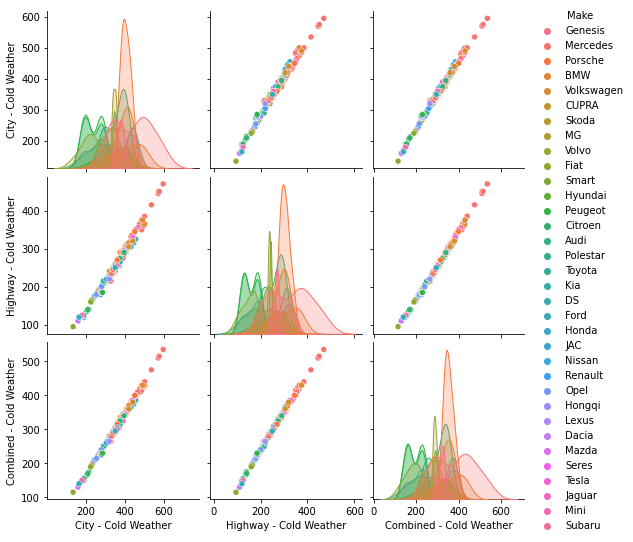

In [ ]:
sns.pairplot(data=df,vars=['City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather'],hue = "Make" )
plt.show()

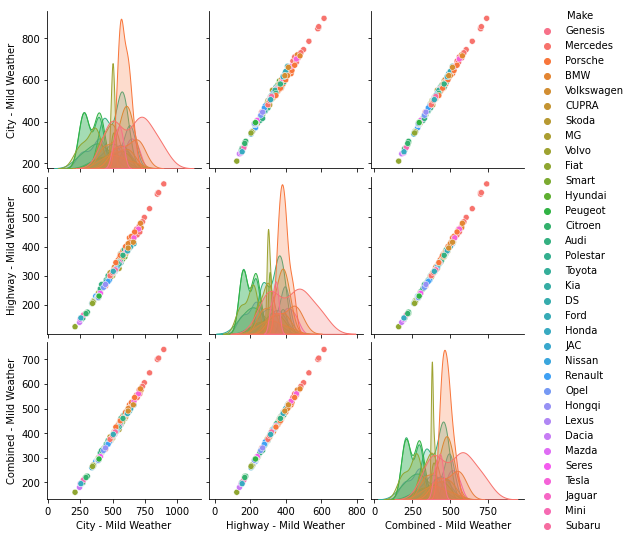

In [ ]:
# Investigating mild weather related variables through a series of visualisations 

sns.pairplot(data = df, vars = ['City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather'],hue = "Make")
plt.show()

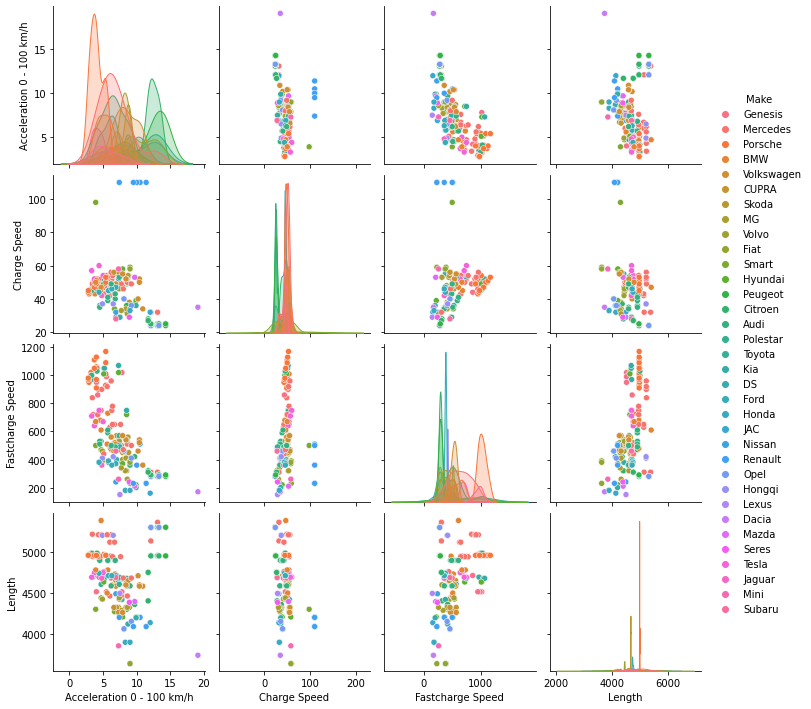

In [ ]:
# Investigating the relation between paired variables from a selection of possibly correlated  variables through a series of visualizations, using Seaborn:

sns.pairplot(data=df,vars=['Acceleration 0 - 100 km/h','Charge Speed','Fastcharge Speed','Length'],hue="Make")
plt.show()

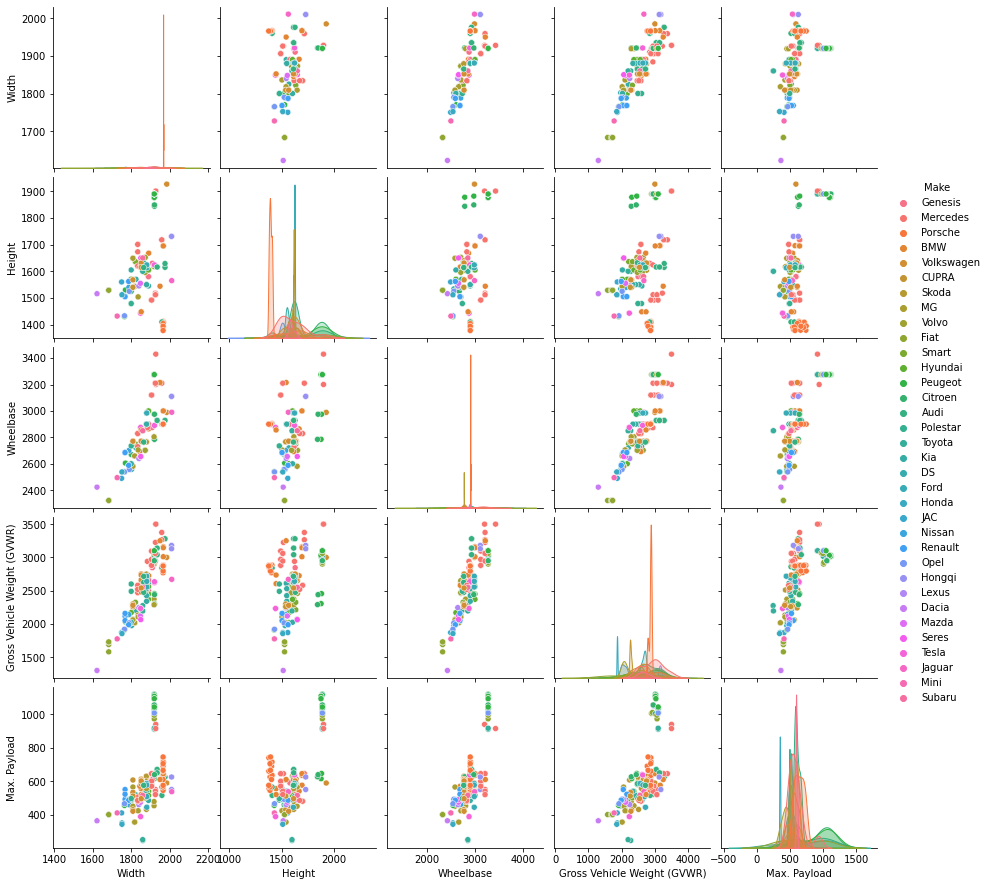

In [ ]:
sns.pairplot(data = df, vars=['Width','Height', 'Wheelbase','Gross Vehicle Weight (GVWR)', 'Max. Payload'],hue = 'Make')
plt.show()

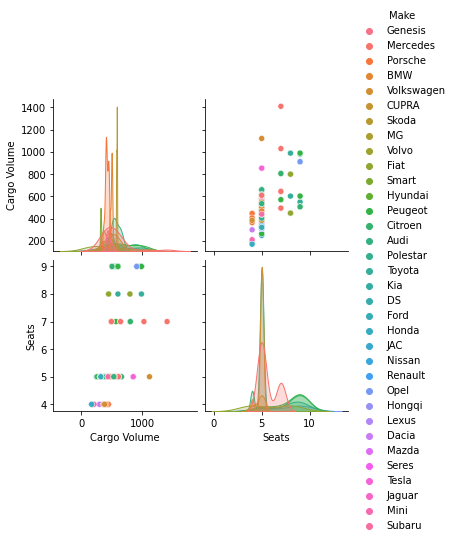

In [ ]:

# Investigating the relation between paired variables from a selection of possibly correlated variables through a series of visualizations, using Seaborn:


sns.pairplot(data=df,vars=['Cargo Volume','Seats'],hue="Make")
plt.show()
     

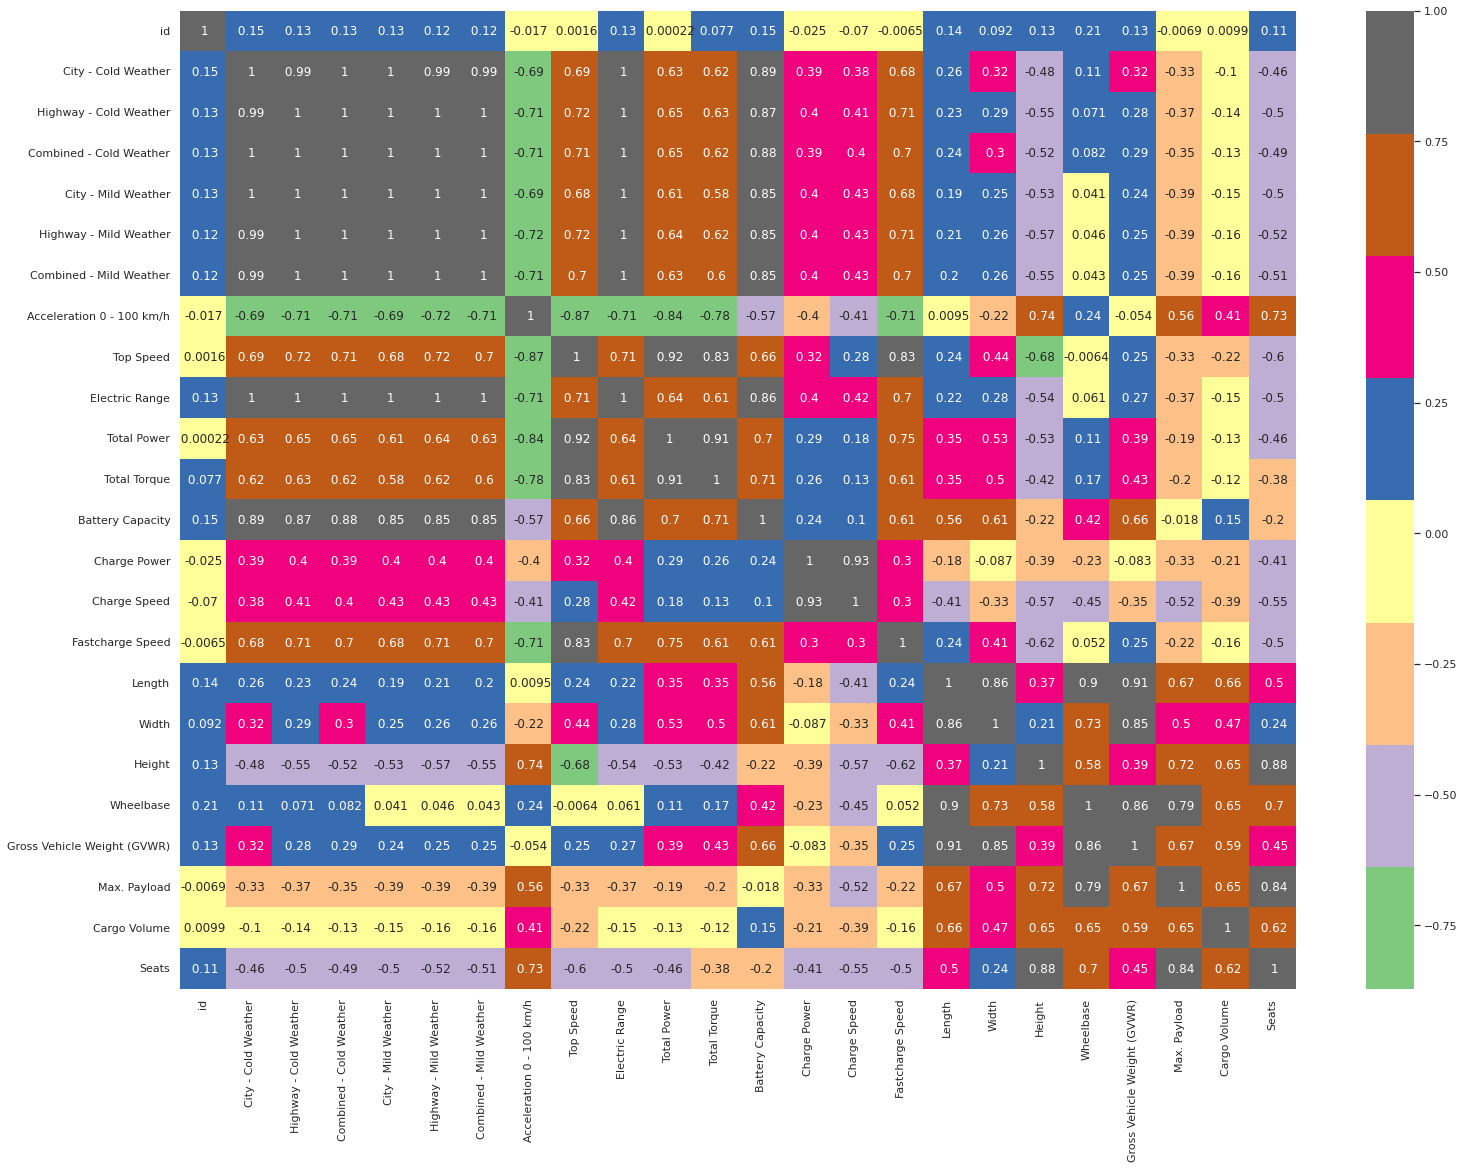

In [ ]:
#  using Seaborn further analyzing and depicting correlations through Heatmap Visualizations

plt.figure(figsize = (25,18))
sns.set_theme(style = "white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True,cmap = "Accent",fmt=' .2g')
plt.show()

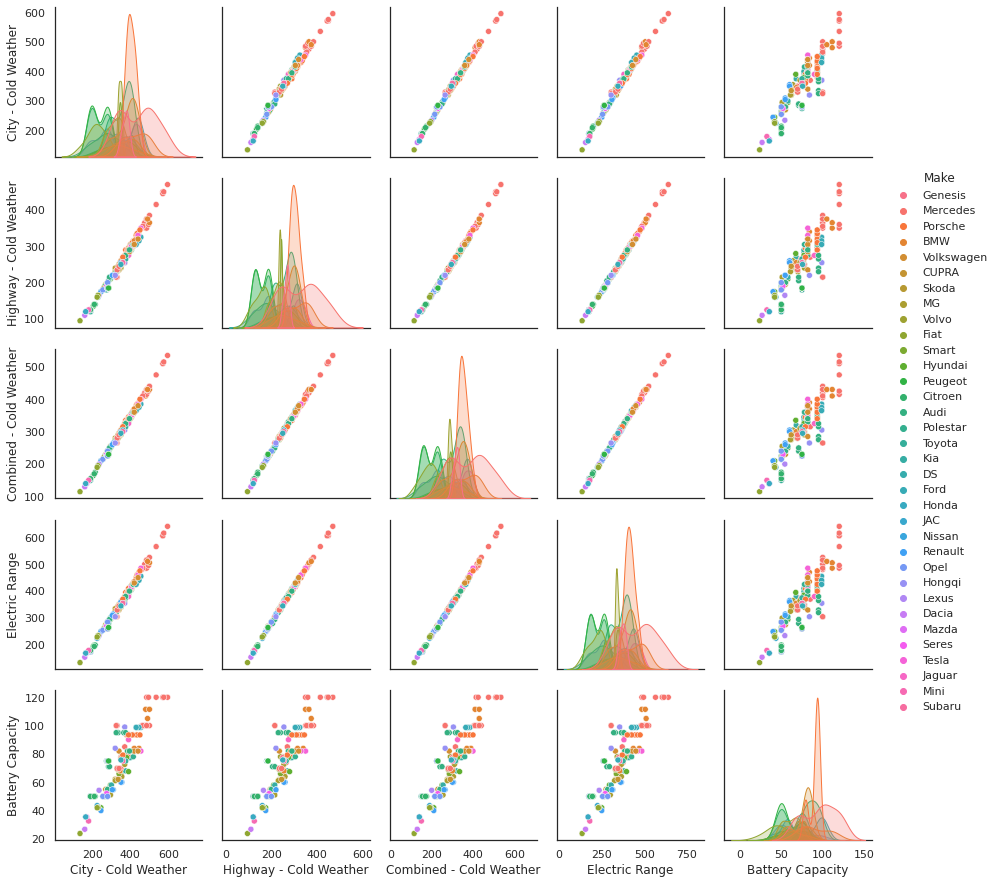

In [ ]:
#Investigating Battery capacity in cold weather 

sns.pairplot(data=df,vars=['City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather', 'Electric Range', 'Battery Capacity'],hue="Make")
plt.show()     


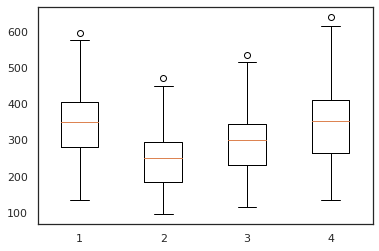

In [ ]:
# Finding outliers in data using box plots matplotlib

columns = [df["City - Cold Weather"],df["Highway - Cold Weather"],df["Combined - Cold Weather"], df["Electric Range"]]
plt.boxplot(columns)
plt.show()

In [ ]:
#red lines are middle values 
# Electric range box has an outlier over 600 


In [ ]:
df["Electric Range"].max() # max range

640

In [ ]:
df["Electric Range"].mean() # the mean (avarage) value of the Electric range variable

345.5927835051546

In [ ]:
df["City - Cold Weather"].max()# max value for City- Cold Weather 

595

In [ ]:
df["City - Cold Weather"].mean()# the mean (avarage) value of the City - Cold Weather variable

343.2474226804124

In [ ]:
df["Highway - Cold Weather"].max() # max value for Highway - Cold Weather

470

In [ ]:
df["Highway - Cold Weather"].mean() # the mean (avarage) value of the Highway - Cold Weather variable

247.5

In [ ]:
df["Combined - Cold Weather"].max() # max value for Combined - Cold Weather

535

In [ ]:
df["Combined - Cold Weather"].mean() # the mean (avarage) value of the Combined- Cold Weather variable

293.1443298969072

In [ ]:
df["Electric Range"].describe()

count    194.000000
mean     345.592784
std      101.384377
min      135.000000
25%      265.000000
50%      352.500000
75%      410.000000
max      640.000000
Name: Electric Range, dtype: float64

In [ ]:
# Grouping the data to try find out car model with greatest electric range 
df.groupby("Make")['Electric Range'].sum()
# Mercedec has got the hightest sum of electric range 

Make
Audi           5775
BMW            3505
CUPRA          1420
Citroen        2420
DS              260
Dacia           155
Fiat           1715
Ford           2880
Genesis        1485
Honda           340
Hongqi          660
Hyundai        1715
JAC             225
Jaguar          380
Kia            2095
Lexus           235
MG             2550
Mazda           170
Mercedes      10945
Mini            180
Nissan          340
Opel           1420
Peugeot        2695
Polestar        820
Porsche        7490
Renault        1600
Seres           270
Skoda          1930
Smart           685
Subaru          355
Tesla          1795
Toyota         2140
Volkswagen     5040
Volvo          1355
Name: Electric Range, dtype: int64

In [ ]:
# Tried to sort and rank the Mercedes model with the highest electric range 

sorted_df = df.sort_values(by =["Electric Range"],ascending = False)
sorted_df

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
155,1483,Mercedes,https://ev-database.org/car/1483/Mercedes-EQS-...,595,470,535,895,615,740,6.2,...,56,960,5216,1926,1512,3210,2945,540,610,5
178,1699,Mercedes,https://ev-database.org/car/1699/Mercedes-EQS-...,575,450,515,855,585,705,5.6,...,53,920,5216,1926,1512,3210,3060,520,610,5
68,1700,Mercedes,https://ev-database.org/car/1700/Mercedes-EQS-...,570,445,510,845,580,700,4.8,...,52,900,5216,1926,1512,3210,3060,520,610,5
32,1484,Mercedes,https://ev-database.org/car/1484/Mercedes-EQS-...,570,450,510,850,585,700,4.3,...,52,900,5216,1926,1512,3210,3060,550,610,5
50,1537,Mercedes,https://ev-database.org/car/1537/Mercedes-EQS-...,535,415,475,785,530,645,3.4,...,49,840,5223,1926,1518,3210,3225,645,610,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1680,Mazda,https://ev-database.org/car/1680/Mazda-MX-30,170,120,140,250,150,195,9.7,...,53,210,4395,1848,1555,2655,2119,474,366,5
59,1233,Honda,https://ev-database.org/car/1233/Honda-e-Advance,165,120,140,255,155,195,8.3,...,33,180,3894,1752,1512,2538,1870,350,171,4
186,1171,Honda,https://ev-database.org/car/1171/Honda-e,165,120,140,255,155,195,9.0,...,33,180,3894,1752,1512,2538,1855,342,171,4
121,1705,Dacia,https://ev-database.org/car/1705/Dacia-Spring-...,160,110,130,245,140,180,19.1,...,35,170,3734,1622,1516,2423,1300,363,300,4


In [ ]:
# sorting and ranging according to cold weather ranges

sorted_df = df.sort_values(by=["City - Cold Weather"], ascending = False)
sorted_df

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
155,1483,Mercedes,https://ev-database.org/car/1483/Mercedes-EQS-...,595,470,535,895,615,740,6.2,...,56,960,5216,1926,1512,3210,2945,540,610,5
178,1699,Mercedes,https://ev-database.org/car/1699/Mercedes-EQS-...,575,450,515,855,585,705,5.6,...,53,920,5216,1926,1512,3210,3060,520,610,5
32,1484,Mercedes,https://ev-database.org/car/1484/Mercedes-EQS-...,570,450,510,850,585,700,4.3,...,52,900,5216,1926,1512,3210,3060,550,610,5
68,1700,Mercedes,https://ev-database.org/car/1700/Mercedes-EQS-...,570,445,510,845,580,700,4.8,...,52,900,5216,1926,1512,3210,3060,520,610,5
50,1537,Mercedes,https://ev-database.org/car/1537/Mercedes-EQS-...,535,415,475,785,530,645,3.4,...,49,840,5223,1926,1518,3210,3225,645,610,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1680,Mazda,https://ev-database.org/car/1680/Mazda-MX-30,170,120,140,250,150,195,9.7,...,53,210,4395,1848,1555,2655,2119,474,366,5
59,1233,Honda,https://ev-database.org/car/1233/Honda-e-Advance,165,120,140,255,155,195,8.3,...,33,180,3894,1752,1512,2538,1870,350,171,4
186,1171,Honda,https://ev-database.org/car/1171/Honda-e,165,120,140,255,155,195,9.0,...,33,180,3894,1752,1512,2538,1855,342,171,4
121,1705,Dacia,https://ev-database.org/car/1705/Dacia-Spring-...,160,110,130,245,140,180,19.1,...,35,170,3734,1622,1516,2423,1300,363,300,4


It returns the same result as above car model : The Mercedes with id 1483

In [ ]:
# Sorting and ranking according to cold weather ranges also consitently returned the same car model: the Mercedes with id 1483

sorted_df=df.sort_values(by=["Highway - Cold Weather"], ascending=False)
sorted_df

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
155,1483,Mercedes,https://ev-database.org/car/1483/Mercedes-EQS-...,595,470,535,895,615,740,6.2,...,56,960,5216,1926,1512,3210,2945,540,610,5
32,1484,Mercedes,https://ev-database.org/car/1484/Mercedes-EQS-...,570,450,510,850,585,700,4.3,...,52,900,5216,1926,1512,3210,3060,550,610,5
178,1699,Mercedes,https://ev-database.org/car/1699/Mercedes-EQS-...,575,450,515,855,585,705,5.6,...,53,920,5216,1926,1512,3210,3060,520,610,5
68,1700,Mercedes,https://ev-database.org/car/1700/Mercedes-EQS-...,570,445,510,845,580,700,4.8,...,52,900,5216,1926,1512,3210,3060,520,610,5
50,1537,Mercedes,https://ev-database.org/car/1537/Mercedes-EQS-...,535,415,475,785,530,645,3.4,...,49,840,5223,1926,1518,3210,3225,645,610,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1171,Honda,https://ev-database.org/car/1171/Honda-e,165,120,140,255,155,195,9.0,...,33,180,3894,1752,1512,2538,1855,342,171,4
126,1680,Mazda,https://ev-database.org/car/1680/Mazda-MX-30,170,120,140,250,150,195,9.7,...,53,210,4395,1848,1555,2655,2119,474,366,5
59,1233,Honda,https://ev-database.org/car/1233/Honda-e-Advance,165,120,140,255,155,195,8.3,...,33,180,3894,1752,1512,2538,1870,350,171,4
121,1705,Dacia,https://ev-database.org/car/1705/Dacia-Spring-...,160,110,130,245,140,180,19.1,...,35,170,3734,1622,1516,2423,1300,363,300,4


In [ ]:
# when sorted according to battery capacity  the Mercedes with id 1483 came second after Mercedes 1699

sorted_df = df.sort_values(by = ["Battery Capacity"], ascending =False)
sorted_df

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
178,1699,Mercedes,https://ev-database.org/car/1699/Mercedes-EQS-...,575,450,515,855,585,705,5.6,...,53,920,5216,1926,1512,3210,3060,520,610,5
155,1483,Mercedes,https://ev-database.org/car/1483/Mercedes-EQS-...,595,470,535,895,615,740,6.2,...,56,960,5216,1926,1512,3210,2945,540,610,5
93,1674,Mercedes,https://ev-database.org/car/1674/Mercedes-EQS-...,485,350,415,690,440,545,6.0,...,42,630,5125,1959,1718,3210,3375,645,645,7
94,1673,Mercedes,https://ev-database.org/car/1673/Mercedes-EQS-...,495,360,425,710,450,560,6.7,...,43,650,5125,1959,1718,3210,3265,645,645,7
32,1484,Mercedes,https://ev-database.org/car/1484/Mercedes-EQS-...,570,450,510,850,585,700,4.3,...,52,900,5216,1926,1512,3210,3060,550,610,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1233,Honda,https://ev-database.org/car/1233/Honda-e-Advance,165,120,140,255,155,195,8.3,...,33,180,3894,1752,1512,2538,1870,350,171,4
186,1171,Honda,https://ev-database.org/car/1171/Honda-e,165,120,140,255,155,195,9.0,...,33,180,3894,1752,1512,2538,1855,342,171,4
176,1409,Mini,https://ev-database.org/car/1409/Mini-Cooper-SE,180,125,150,275,165,210,7.3,...,58,260,3850,1727,1432,2495,1775,410,211,4
121,1705,Dacia,https://ev-database.org/car/1705/Dacia-Spring-...,160,110,130,245,140,180,19.1,...,35,170,3734,1622,1516,2423,1300,363,300,4


In [ ]:
# Anylyzing Further
# Exploring fast charge speed if travelling long distances

last_table = df[['id','Electric Range','City - Cold Weather', 'Highway - Cold Weather', 'City - Mild Weather', 'Combined - Cold Weather', 'Fastcharge Speed']]
last_table

,id,Electric Range,City - Cold Weather,Highway - Cold Weather,City - Mild Weather,Combined - Cold Weather,Fastcharge Speed
0,1647,390,390,275,575,330,1020
1,1493,330,330,235,480,280,470
2,1229,415,400,305,580,350,1020
3,1252,470,445,340,670,390,730
4,1534,450,440,320,660,380,570
...,...,...,...,...,...,...,...
189,1116,400,390,290,560,340,980
190,1533,450,440,320,660,380,570
191,1547,195,210,140,295,170,310
192,1492,400,395,290,580,340,500


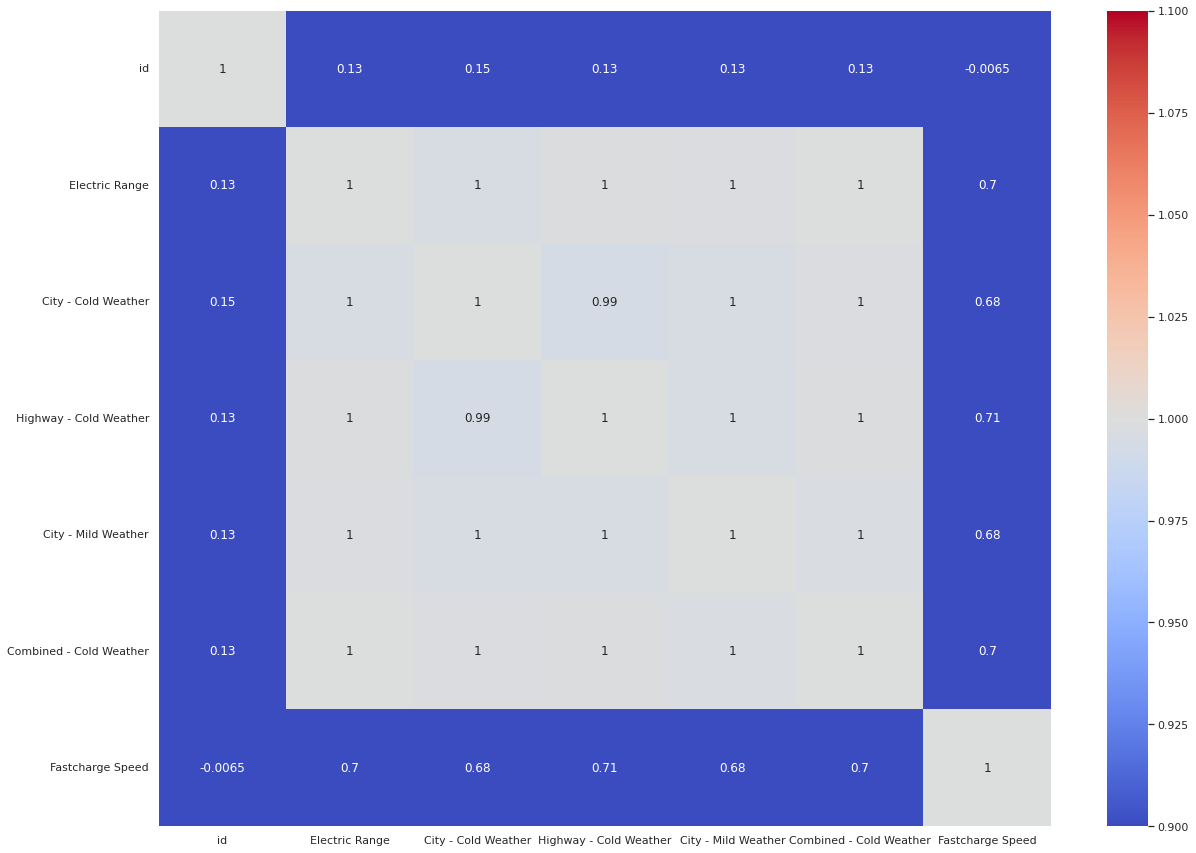

In [ ]:
# Creating a heatmap of any present correlations between 'last_table'

plt.figure(figsize = (20,15))
sns.heatmap(last_table.corr(),annot =True,vmin = 1, vmax =1,cmap = "coolwarm");

In [ ]:
sort_table = last_table.sort_values(by=["Electric Range"], ascending =False)
sort_table

,id,Electric Range,City - Cold Weather,Highway - Cold Weather,City - Mild Weather,Combined - Cold Weather,Fastcharge Speed
155,1483,640,595,470,895,535,960
178,1699,615,575,450,855,515,920
68,1700,605,570,445,845,510,900
32,1484,605,570,450,850,510,900
50,1537,565,535,415,785,475,840
...,...,...,...,...,...,...,...
126,1680,170,170,120,250,140,210
59,1233,170,165,120,255,140,180
186,1171,170,165,120,255,140,180
121,1705,155,160,110,245,130,170


Mercedes the model id 1483  has the highest fast charge  speed as well.

In [ ]:
# Sorting the data by greatest 'Electric Range '
sort_table.set_index('Electric Range',inplace =True)

In [ ]:
sort_table

,id,City - Cold Weather,Highway - Cold Weather,City - Mild Weather,Combined - Cold Weather,Fastcharge Speed
Electric Range,,,,,,
640,1483,595,470,895,535,960
615,1699,575,450,855,515,920
605,1700,570,445,845,510,900
605,1484,570,450,850,510,900
565,1537,535,415,785,475,840
...,...,...,...,...,...,...
170,1680,170,120,250,140,210
170,1233,165,120,255,140,180
170,1171,165,120,255,140,180


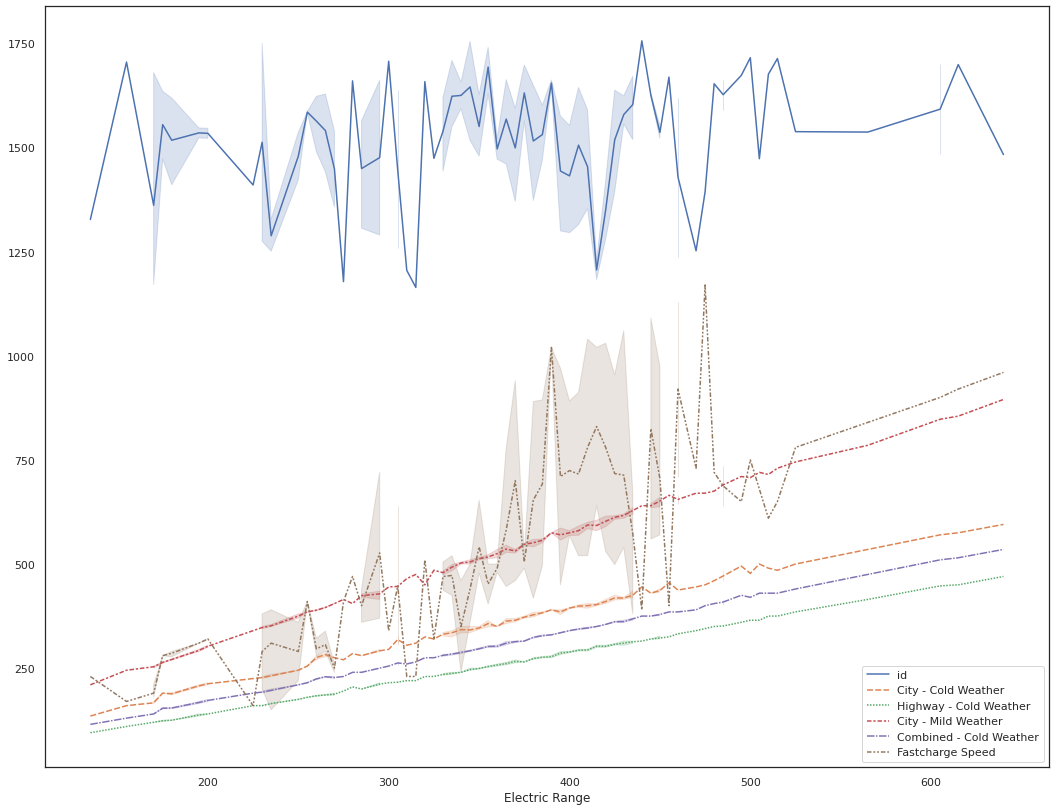

In [ ]:
plt.figure(figsize =(18,14))
sns.lineplot(data = sort_table)
plt.show()

In [ ]:
# Sorting table by Electric range to get the ranked top 20
 

plotdata =last_table.sort_values(by=["Electric Range"],ascending = False)
plotdata1 = plotdata.head(20).reset_index()

In [ ]:
# dropping the index 

plotdata1.drop(('index'),inplace =True, axis =1)

In [ ]:
plotdata1

,id,Electric Range,City - Cold Weather,Highway - Cold Weather,City - Mild Weather,Combined - Cold Weather,Fastcharge Speed
0,1483,640,595,470,895,535,960
1,1699,615,575,450,855,515,920
2,1700,605,570,445,845,510,900
3,1484,605,570,450,850,510,900
4,1537,565,535,415,785,475,840
5,1538,525,500,385,745,440,780
6,1714,515,485,375,730,430,650
7,1713,515,485,375,730,430,650
8,1676,510,490,375,715,430,610
9,1473,505,500,365,720,430,680


In [ ]:
plotdata1.set_index('id', inplace= True)

<Figure size 1800x1296 with 0 Axes>

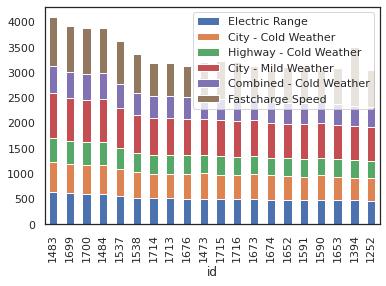

In [ ]:
plt.figure(figsize=(25,18))
plotdata1.plot(kind="bar",stacked=True)
plt.show()

**Conclusion**


 After conducting analysis above, I would recommend the Mercedes with id 1483. I have chosen this model, as the only factor the client mentioned to meet their brief would be an electric vehicle capable of high mileage/ long distances, and this is catered for by the 'Electric Range' of the vehicle. I have chosen The Mercedes with id 1483, as my recommendation as it outranks all other cars and a budget limit has not been set. Mercedes with id 1483 has superior values for Electric range, Range in Cold and mild weather both in the city and on the Highway, so that the car will be able to travel long distances in cool weather as native to the UK and the battery will be able to be charged quickly,to prevent drivers and passengers becoming stranded or delayed on longer journeys.

